<a href="https://colab.research.google.com/github/TurboGoose/Optimization/blob/main/Optimization3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Коновалов Илья (группа 19.Б05-пу)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from math import *
import pandas as pd

In [73]:
P1 = len("Коновалов") # 9
P2 = len("Илья")      # 4
Q1 = len("Олегович")  # 8
Q2 = P2               # 4 
P = complex(P1, P2)
Q = complex(Q1, Q2)

R = 1
PRECISION = 1.e-6

In [ ]:
def function(x, y):
    return (x**2 - y**2 + x*P1 - y*P2 + Q1)**2 + (2*x*y + y*P1 + x*P2 + Q2)**2

def der_x(x, y):
    return 2*((x**2 - y**2 + x*P1 - y*P2 + Q1)*(2*x + P1) + (2*x*y + y*P1 + x*P2 + Q2)*(2*y + P2))

def der_y(x, y):
    return 2*((2*x*y + y*P1 + x*P2 + Q2)*(2*x + P1) - (x**2 - y**2 + x*P1 - y*P2 + Q1)*(2*y + P2))

In [ ]:
def circle(x, y):
    return x**2 + y**2 - R**2 

def circle_der_x(x, y):
    return 2 * x

def circle_der_y(x, y):
    return 2 * y

In [ ]:
def line(x, y):
    return y - x

def line_der_x(x, y):
    return -1

def line_der_y(x, y):
    return 1

# Линии уровня функции |f(z)|^2

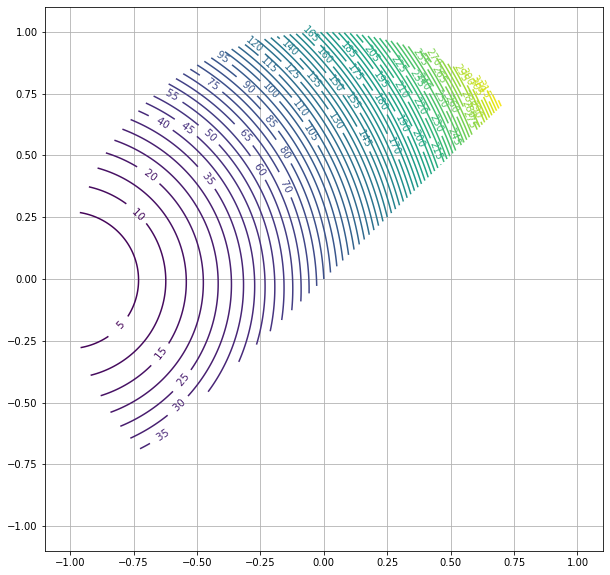

In [84]:
def show_contour():
    amount = np.int(1000)
    x = np.linspace(-R - 0.1, R + 0.1, amount)  
    y = np.linspace(-R - 0.1, R + 0.1, amount)
    x,y = np.meshgrid(x,y)
    f = np.vectorize(lambda x, y: function(x, y) if line(x, y) >= 0 >= circle(x, y) else np.nan)
    z = f(x, y)
    fig = plt.figure(figsize=(10,10))
    ax = plt.subplot()
    cs = ax.contour(x, y, z, levels = 70)
    ax.clabel(cs, fmt = "%3.0f")
    plt.grid()
    plt.show()

show_contour()

In [87]:
def show_trace(x_history, y_history):
    amount = np.int(1000)
    x = np.linspace(-R - 0.1, R + 0.1, amount)  
    y = np.linspace(-R - 0.1, R + 0.1, amount)
    x,y = np.meshgrid(x,y)
    f = np.vectorize(lambda x, y: 
                     function(x, y) if y >= x and x**2 + y**2 <= R else np.nan)
    z = f(x, y)
    fig = plt.figure(figsize=(10,10))
    ax = plt.subplot()
    cs = ax.contour(x, y, z, levels = 70)
    ax.clabel(cs, fmt = "%3.0f")
    plt.scatter(x_history, y_history, c = 'deeppink')
    plt.grid()
    plt.show()

# Условный градиент

Результат: Re = -0.99717, Im = -0.00000


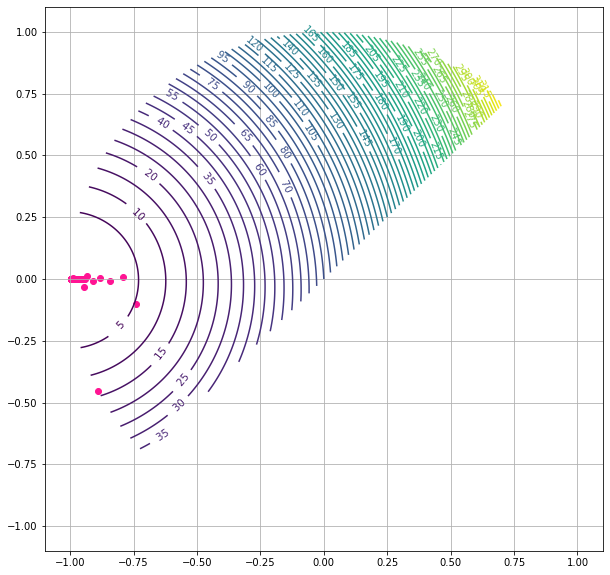

,Re,Im,|f|^2,gr_x,gr_y,gr_mod,alpha
Step,,,,,,,
0,-0.891389,-4.532399e-01,13.709339,332.250000,1.689375e+02,372.733070,1.000000
1,-0.740761,-1.005885e-01,5.250377,16.797645,-5.566876e+01,58.147839,0.250000
2,-0.790836,9.118673e-03,2.982610,36.328286,-1.305728e+01,38.603587,0.250000
3,-0.842753,-6.822486e-03,1.664050,29.097200,1.592424e+00,29.140742,0.250000
4,-0.881925,3.243445e-03,0.930514,21.479664,-7.187085e-01,21.491685,0.250000
...,...,...,...,...,...,...,...
194,-0.997124,-5.102442e-07,0.000538,0.375728,-1.929033e-07,0.375728,0.003906
195,-0.997135,-5.062612e-07,0.000534,0.374259,-1.906474e-07,0.374259,0.003906
196,-0.997146,-5.023093e-07,0.000530,0.372796,-1.884180e-07,0.372796,0.003906


In [96]:
def gradient(x, y, tetta=0.5):
    alpha = 1
    p_x = inf
    p_y = inf
    data = {'Re': [], 'Im': [], '|f|^2': [], 'gr_x':[],
            'gr_y':[], 'gr_mod':[], 'alpha' :[]}
    while fabs(p_x) > PRECISION and fabs(p_y) > PRECISION:
        gr_x = der_x(x, y)
        gr_y = der_y(x, y)
        gr_mod = np.sqrt(gr_x ** 2 + gr_y ** 2)
        x_k = -R * (gr_x) / gr_mod
        y_k = -R * (gr_y) / gr_mod
        p_x = x_k - x
        p_y = y_k - y
        new_x = x + alpha * p_x
        new_y = y + alpha * p_y

        if function(new_x, new_y) < function(x, y) and line(new_x, new_y) >= 0 and circle(new_x, new_y) <= 0:
            x = new_x
            y = new_y
            data['Re'].append(x)
            data['Im'].append(y)
            data['|f|^2'].append(function(x, y))
            data['gr_x'].append(gr_x)
            data['gr_y'].append(gr_y)
            data['gr_mod'].append(gr_mod)
            data['alpha'].append(alpha)
        else:
            alpha *= tetta

    data = pd.DataFrame(data)
    data.index.rename('Step', inplace=True)
    return complex(x, y), data

res, data = gradient(0.5, 0.75)
print("Результат: Re = {:.5f}, Im = {:.5f}".format(res.real, res.imag))
show_trace(data['Re'], data['Im'])
data